## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

### Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.


---

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

---

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

---

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 



## Project 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [5]:
df.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


## Part 1: Understanding Product Categories
- Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [102]:
# category	proportion
# 0	Sports & Outdoors	0.342219
# 1	Beauty	0.007903
# 2	Handmade Clothing, Shoes & Accessories	0.007869
# 3	Bath & Body	0.007813
# 4	Birthday Gifts	0.007766

### 1. Frequency Tables:

- Generate a frequency table for the product category.
- Which are the top 5 most listed product categories?

                    
 

In [8]:
df_frequency = df.copy()

In [10]:
df_frequency.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


In [12]:
df_frequency_category = df_frequency["category"]

In [14]:
df_frequency_category.value_counts() [:5]

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [47]:
df_frequency.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


In [57]:
df_frequency_table = df_frequency.category.value_counts(normalize=True)

In [66]:
df_frequency_table = df_frequency_table.reset_index()
df_frequency_table

,category,proportion
0,Sports & Outdoors,0.342219
1,Beauty,0.007903
2,"Handmade Clothing, Shoes & Accessories",0.007869
3,Bath & Body,0.007813
4,Birthday Gifts,0.007766
...,...,...
291,Alexa Built-In Devices,0.000044
292,Motorbike Chassis,0.000044
293,Plugs,0.000044
294,Smart Home Security & Lighting,0.000043


In [72]:
df_frequency_table["proportion"].min()

2.2098081927411074e-05

In [74]:
df_frequency.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


In [104]:
df_frequency_tittle_cat = df_frequency[["category", "title"]]
df_frequency_tittle_cat

,category,title
0,Hi-Fi Speakers,"Echo Dot (5th generation, 2022 release) | Big ..."
1,Hi-Fi Speakers,"Anker Soundcore mini, Super-Portable Bluetooth..."
2,Hi-Fi Speakers,"Echo Dot (5th generation, 2022 release) | Big ..."
3,Hi-Fi Speakers,"Echo Dot with clock (5th generation, 2022 rele..."
4,Hi-Fi Speakers,Introducing Echo Pop | Full sound compact Wi-F...
...,...,...
2443646,Motorbike Clothing,"Motorbike Armour, Motorbike Clothing, Cycling ..."
2443647,Motorbike Clothing,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...
2443648,Motorbike Clothing,Men’s Motorcycle Motorbike Biker Trousers Kevl...
2443649,Motorbike Clothing,Texpeed Mens Motorcycle Motorbike Biker Trouse...


In [97]:
#rosstab_result = pd.crosstab(index=df_frequency_tittle_cat["title"], columns=df_frequency_tittle_cat["category"])
#rosstab_result.head(2)

### 2. Visualizations:

- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [115]:
xd = df_frequency_category.value_counts() [:5]
xd



category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

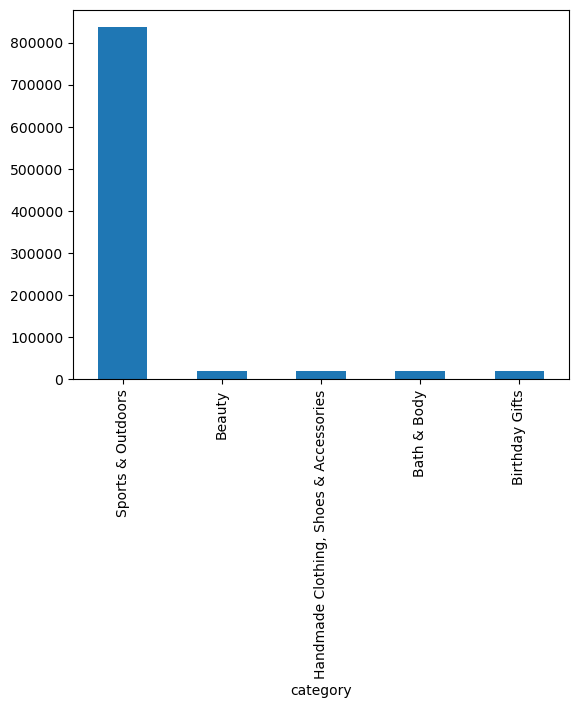

In [117]:
xd.plot(kind="bar")
plt.show()

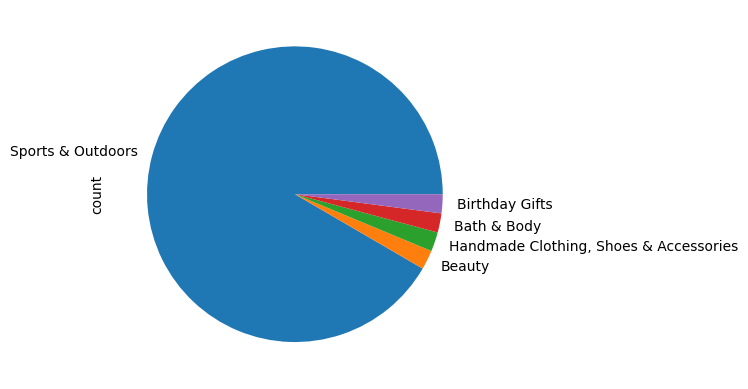

In [27]:
xd.plot(kind="pie")
plt.show()

 
## Part 2: Delving into Product Pricing
- Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

 

### 1. Measures of Centrality:

- Calculate the mean, median, and mode for the price of products.
- What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [1237]:
part2 = df.copy()


In [1239]:
part2.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


#### test

In [812]:
testpart2 = part2.copy()
test = testpart2

In [814]:
test = part2[["title", "price"]]

In [1204]:
test.head(2)

,title,price
0,"Echo Dot (5th generation, 2022 release) | Big ...",21.99
1,"Anker Soundcore mini, Super-Portable Bluetooth...",23.99


In [1206]:
df_part2 = part2[["title","price"]]
test555 = df_part2["title"].value_counts()

test555 = test555.head(6)
 
test555 = pd.DataFrame(test555)
test555 = test555.reset_index()
test555

,title,count
0,OYhmc Portable Pedal Exerc,723
1,ScibOr Outdoor Sleeveless Fishing Vest,322
2,"SHOPPRO Kids Golf Shoes Set, White, with Shoes...",224
3,Mens Breathable Lace-Up Football Shoes Non-Sli...,144
4,CMP Women's T-shirt,129
5,"Paris PSG Football Kit for Kids,2023/24 PSG Je...",121


In [818]:
test["title"].value_counts()

title
OYhmc Portable Pedal Exerc                                                                                                                                                                        723
ScibOr Outdoor Sleeveless Fishing Vest                                                                                                                                                            322
SHOPPRO Kids Golf Shoes Set, White, with Shoes Bag, UV Sun Protection Arm Sleeves, Golf Pro Cap and Instant Cooling Towel, Outdoor Sneakers, Girls Sport Training, POSMA GSH007WHT39_B (White)    224
Mens Breathable Lace-Up Football Shoes Non-Slip Outdoor Boys Junior Soccer Shoes Training Professional Boots Soccer Sneakers Athletics Training Shoes for Teenager                                144
CMP Women's T-shirt                                                                                                                                                                               129
    

In [819]:
test2 = test[test["title"] == "OYhmc Portable Pedal Exerc"]

In [820]:
test2["title"].value_counts()

title
OYhmc Portable Pedal Exerc    723
Name: count, dtype: int64

In [821]:
test2["price"].value_counts() 

price
117.99    10
199.99     7
598.99     7
289.99     7
159.99     7
          ..
577.99     1
468.99     1
490.99     1
247.99     1
140.99     1
Name: count, Length: 358, dtype: int64

In [859]:
import pandas as pd

def calculate_price_mean(df_part2, df_names):
    price_means = {}
    
    names_list = df_names["title"].tolist()
    
    for i in names_list:
        mean_test = df_part2[df_part2["title"] == name][["title", "price"]]
        if not mean_test.empty:
            mean = mean_test["price"].mode()
            price_means[name] = mean
    return price_means


In [861]:
ttt = calcular_media_precio(part2, test888)

In [863]:
ttt = pd.DataFrame(ttt)

In [865]:
ttt

,"Echo Dot (5th generation, 2022 release) | Big vibrant sound Wi-Fi and Bluetooth smart speaker with Alexa | Charcoal","Anker Soundcore mini, Super-Portable Bluetooth Speaker with 15-Hour Playtime, 66-Foot Bluetooth Range, Wireless Speaker with Enhanced Bass, Noise-Cancelling Microphone, for Outdoor, Travel, Home"
0,21.99,23.99


In [ ]:
def calculate_mean_median_mode_test(df, list_name):
    calculate_df = {}
    list_name = list_name["title"].tolist()
    for i in list_name:
        data = df[df["title"] == i]["price"]
        data_mean = data.mean()
        calculate_df[i] = {"mean": data_mean}
    return calculate_df
    

In [ ]:
rrrr = calculate_mean_median_mode_test(df, test555)

In [1195]:
rrrr = pd.DataFrame(rrrr)
rrrr

,OYhmc Portable Pedal Exerc,ScibOr Outdoor Sleeveless Fishing Vest,"SHOPPRO Kids Golf Shoes Set, White, with Shoes Bag, UV Sun Protection Arm Sleeves, Golf Pro Cap and Instant Cooling Towel, Outdoor Sneakers, Girls Sport Training, POSMA GSH007WHT39_B (White)",Mens Breathable Lace-Up Football Shoes Non-Slip Outdoor Boys Junior Soccer Shoes Training Professional Boots Soccer Sneakers Athletics Training Shoes for Teenager,CMP Women's T-shirt,"Paris PSG Football Kit for Kids,2023/24 PSG Jerseys Football Kits Home/Away,No.7/10/30 Football Training Set T-shirts Shorts and Socks,2023 Outdoor Sportswear Soccer Tracksuit for boy Adult"
mean,332.34408,30.472764,77.625,34.3125,28.098992,9.006529


#### good

In [1273]:
#list products intitle


title_list_part2 = df.copy()

title_list_part2 = title_list_part2[["title","price"]]
title_list_part2 = title_list_part2["title"].value_counts()

title_list_part2 =  title_list_part2.reset_index()
title_list_part2 = title_list_part2.head(6)

#test
title_list_part2

,title,count
0,OYhmc Portable Pedal Exerc,723
1,ScibOr Outdoor Sleeveless Fishing Vest,322
2,"SHOPPRO Kids Golf Shoes Set, White, with Shoes...",224
3,Mens Breathable Lace-Up Football Shoes Non-Sli...,144
4,CMP Women's T-shirt,129
5,"Paris PSG Football Kit for Kids,2023/24 PSG Je...",121


In [1275]:
#function to calculate the mean median mode different products

def calculate_price_mean_median_mode(df, df_title_list):
    price_mean_median_mode = {}
    df_title_list = df_title_list["title"].tolist()
    
    for i in df_title_list:  
        filtered_prices = df[df["title"] == i]["price"]
        mean_price = filtered_prices.mean()
        median_price = filtered_prices.median()
        mode_price = filtered_prices.mode().tolist()  
        price_mean_median_mode[i] = {"mean": mean_price, "median": median_price, "mode": mode_price}
    return price_mean_median_mode  

In [1277]:
products_title_calculate = calculate_price_mean_median_mode(df, title_list_part2)

In [1278]:
products_title_calculate = pd.DataFrame(products_title_calculate)
products_title_calculate

,OYhmc Portable Pedal Exerc,ScibOr Outdoor Sleeveless Fishing Vest,"SHOPPRO Kids Golf Shoes Set, White, with Shoes Bag, UV Sun Protection Arm Sleeves, Golf Pro Cap and Instant Cooling Towel, Outdoor Sneakers, Girls Sport Training, POSMA GSH007WHT39_B (White)",Mens Breathable Lace-Up Football Shoes Non-Slip Outdoor Boys Junior Soccer Shoes Training Professional Boots Soccer Sneakers Athletics Training Shoes for Teenager,CMP Women's T-shirt,"Paris PSG Football Kit for Kids,2023/24 PSG Jerseys Football Kits Home/Away,No.7/10/30 Football Training Set T-shirts Shorts and Socks,2023 Outdoor Sportswear Soccer Tracksuit for boy Adult"
mean,332.34408,30.472764,77.625,34.3125,28.098992,9.006529
median,309.99,30.35,78.0,34.66,27.99,8.99
mode,[117.99],[35.01],[78.0],[34.66],[27.99],[8.99]


In [ ]:
products_title_calculate.index

- Calculate the mean, median, and mode for the price of products.
- What's the average price point of products listed? How does this compare with the most common price point (mode)?
- answer: There are products deviate from the others, resulting in higher average price "OYhmc Portable Pedal Exerc"

### 2. Measures of Dispersion:

- Determine the variance, standard deviation, range, and interquartile range for product price.
- How varied are the product prices? Are there any indicators of a significant spread in prices?

In [2874]:
measures_of_dispersion = df.copy()
measures_of_dispersion.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


In [3089]:
#list products intitle
test_measures_of_dispersion = df.copy()
test_measures_of_dispersion = test_measures_of_dispersion[["title","category", "price"]]
#test_measures_of_dispersion =  test_measures_of_dispersion.reset_index()
#test_measures_of_dispersion = test_measures_of_dispersion.head(10)
#test
test_measures_of_dispersion.head(2)

,title,category,price
0,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers,21.99
1,"Anker Soundcore mini, Super-Portable Bluetooth...",Hi-Fi Speakers,23.99


#### test 

In [1654]:
measures_of_dispersion.head(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


In [1655]:
measures_of_dispersion = measures_of_dispersion[["title", "category"]]

In [1656]:
measures_of_dispersion = measures_of_dispersion[:5000]
measures_of_dispersion.head(2)


,title,category
0,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers
1,"Anker Soundcore mini, Super-Portable Bluetooth...",Hi-Fi Speakers


In [1657]:
measures_of_dispersion.shape

(5000, 2)

In [2236]:
#test_measures_of_dispersion

In [2238]:
#   crosstab_result = pd.crosstab(index=cat.MSZoning, columns=cat.SaleCondition)
# pd.crosstab(index=cat.MSZoning, columns='count')

In [2853]:
test2323 = pd.crosstab( df.price, df.category )

In [2854]:
#test2323 = test2323.reset_index()
#test2323 = test2323[["category", "count"]].reset_index()
test2323

category,3D Printers,3D Printing & Scanning,Abrasive & Finishing Products,Action Cameras,Adapters,Agricultural Equipment & Supplies,Alexa Built-In Devices,Art & Craft Supplies,Arts & Crafts,Baby,...,Uninterruptible Power Supply Units & Accessories,Vacuums & Floorcare,Vases,"Water Coolers, Filters & Cartridges",Wearable Technology,Wind Instruments,Window Treatments,Women,Women's Sports & Outdoor Shoes,eBook Readers & Accessories
price,,,,,,,,,,,,,,,,,,,,,
0.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22933.42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23482.73,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24674.59,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2861]:
test2323["Adapters"].value_counts()

Adapters
0     82812
1        74
2        12
3         5
4         4
5         2
12        1
14        1
18        1
19        1
23        1
8         1
21        1
Name: count, dtype: int64

In [2827]:
#test2323 = test2323.reset_index()
test2323 = test2323[["category", "index"]]

test2323

col_0,category,index
0,3D Printers,0
1,3D Printing & Scanning,1
2,Abrasive & Finishing Products,2
3,Action Cameras,3
4,Adapters,4
...,...,...
291,Wind Instruments,291
292,Window Treatments,292
293,Women,293
294,Women's Sports & Outdoor Shoes,294


In [2685]:
#test2323 = test2323[["category", "count"]].sort_values(by="count", ascending=False)
 
test2323 = test2323.sort_values(by="count", ascending=False)
test2323


col_0,category,count
262,Sports & Outdoors,836265
20,Beauty,19312
116,"Handmade Clothing, Shoes & Accessories",19229
16,Bath & Body,19092
29,Birthday Gifts,18978
...,...,...
195,Motorbike Chassis,107
226,Plugs,107
6,Alexa Built-In Devices,107
254,Smart Home Security & Lighting,104


In [2560]:
testvvvv["count"].max()

723

In [2562]:
testvvvv = testvvvv.sort_values(by="count", ascending=False)

In [2535]:
testvvvv

col_0,count
title,
OYhmc Portable Pedal Exerc,723
ScibOr Outdoor Sleeveless Fishing Vest,322
"SHOPPRO Kids Golf Shoes Set, White, with Shoes Bag, UV Sun Protection Arm Sleeves, Golf Pro Cap and Instant Cooling Towel, Outdoor Sneakers, Girls Sport Training, POSMA GSH007WHT39_B (White)",224
Mens Breathable Lace-Up Football Shoes Non-Slip Outdoor Boys Junior Soccer Shoes Training Professional Boots Soccer Sneakers Athletics Training Shoes for Teenager,144
CMP Women's T-shirt,129
...,...
Glysolid Body Lotion Classic With Musk 500 ML,1
Glysolid Body Lotion 500Ml by Glysolid,1
"Glysolid - Crema Classica Mani Screpolate, Idratazione Intensiva - 100 ml",1


In [2537]:
testvvvv = testvvvv.reset_index()
testvvvv
testvvvv = testvvvv.reset_index()
testvvvv

col_0,index,title,count
0,0,OYhmc Portable Pedal Exerc,723
1,1,ScibOr Outdoor Sleeveless Fishing Vest,322
2,2,"SHOPPRO Kids Golf Shoes Set, White, with Shoes...",224
3,3,Mens Breathable Lace-Up Football Shoes Non-Sli...,144
4,4,CMP Women's T-shirt,129
...,...,...,...
2077586,2077586,Glysolid Body Lotion Classic With Musk 500 ML,1
2077587,2077587,Glysolid Body Lotion 500Ml by Glysolid,1
2077588,2077588,"Glysolid - Crema Classica Mani Screpolate, Idr...",1
2077589,2077589,Glynt VOLUME Energy Shampoo 2 for Fine and Thi...,1


In [2539]:
#est2323 = test2323.rename(columns={"count": "conteo"})
#test2323 = test2323.rename(columns={"level_0": "count"})
#test2323

In [2553]:
testaaaaa = testvvvv["title"].value_counts(normalize=True).round(5)
testaaaaa

title
OYhmc Portable Pedal Exerc                                                                                                                                                                                 0.0
AOLALA Black Ceiling Lights Chandelier 6 Lights Light Fittings Ceilings, Industrial Sputnik Flush Fitting Ceiling Lights, Modern Ceiling Lamp for Living Room Kitchen Bedroom Dining Room Hallway E27      0.0
AOMIG Baby Reins, Baby Walking Reins and Toddler Safety Harness, Dinosaur Baby Reins Safety Leash for Toddlers Boys and Girls (Green)                                                                      0.0
AOMIG Girls White Snow Costume, Deluxe White Snow Princess Fancy Dress With Crown Wand and Red Cape, White Snow Princess Dress Up for Girls Birthday Bridesmaid Christmas Carnival Halloween Cosplay       0.0
AOMEKIE Rifle Scope 4X32mm Red/Green/Blue Illuminated Rapid Range Reticle Airsoft Red Dot Sight Scope with Top Fiber Optic Sight and 11mm/22mm Picatinny Rail Mount fo

In [2544]:
#resultado["frequency"] = resultado["frequency"].round(8)

In [2546]:
testaaaaa = testaaaaa.reset_index()
testaaaaa

 


,count,proportion
0,1,0.88121
1,2,0.08925
2,3,0.01989
3,4,0.00575
4,5,0.00156
...,...,...
85,62,0.00000
86,59,0.00000
87,53,0.00000
88,52,0.00000


In [2548]:
testaaaaa = testaaaaa.reset_index()
testaaaaa = testaaaaa.rename(columns={"index": "col_0"})
testaaaaa

,col_0,count,proportion
0,0,1,0.88121
1,1,2,0.08925
2,2,3,0.01989
3,3,4,0.00575
4,4,5,0.00156
...,...,...,...
85,85,62,0.00000
86,86,59,0.00000
87,87,53,0.00000
88,88,52,0.00000


In [2551]:
result = pd.merge(testvvvv, testaaaaa, on="col_0")



KeyError: 'col_0'

In [1854]:
test2323.shape

(2077591, 2)

In [1868]:
test2323.sample(10)

col_0,title,count
558212,EYNMVR Oversized Sweatshirts for Women Tie Dye...,1
1568633,SecureFix Direct Horse Treat Ball Toy (Stable ...,1
1834247,Voltage Regulator Reliable for Generators,1
1446096,REHJJDFD Women Knitted Midi Sweater Dress Wome...,1
1170538,"Mini Mechanical Keyboard, Acrylic Computer Uni...",1
229511,B.O.T. Cosmetics & Wellness - Organic Peppermi...,1
2060059,slam ball Adjustable Fitness Aqua Bag for Home...,1
871536,Imation - CDRW 4-12X 10-pack Retail showbox - MTV,1
706769,"Garden Wooden Greenhouse Cold frame, Transpare...",1
1776013,Ultra Fine Filter Cartridges 9991432-R4 Roboti...,1


In [1860]:
test2323["count"].max()

723

#### data

In [3051]:
test_measures = test_measures_of_dispersion.copy()

In [3091]:
test_measures.head(1)

,title,category,price
0,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers,21.99


In [3093]:
test_measures['price'] = test_measures['price'].round(5)
test_measures.head(1)

,title,category,price
0,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers,21.99


In [3057]:
test_measures.shape

(2443651, 3)

In [3061]:
#test2323 = test2323.sort_values(by="count", ascending=False)
#test_measures  = test_measures["category"].value_counts()
test_measures.head(2)

,title,category,price
0,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers,21.99
1,"Anker Soundcore mini, Super-Portable Bluetooth...",Hi-Fi Speakers,23.99


In [2943]:
xd = test_measures.describe()  #std **2 variaza, 0-10 normal -10-50 morderate  +50 alta
xd = xd.reset_index()

In [2951]:
xd["price"] = xd["price"].round(2)

In [2953]:
xd

,index,price
0,count,2443651.00
1,mean,89.24
2,std,345.61
3,min,0.00
4,25%,9.99
5,50%,19.09
6,75%,45.99
7,max,100000.00


In [3063]:
df["price"].max()

100000.0

In [3073]:
c = 345.61 ** 2
c  

119446.27210000002

In [ ]:
#There is significant dispersion in the products, considering that the variance is 119446.27


In [3083]:
p1 = 9.99  # q1
p3 = 45.99  # q3

#IQR 
iqr = p3 - p1

lim_sup = p3 + 1.5 * iqr  #limit superior
lim_inf = p1 - 1.5 * iqr  #limit inferior

var = 345.61 ** 2

In [3085]:
var

119446.27210000002

In [3000]:
iqr

36.0

In [3077]:
lim_sup

99.99000000000001

In [3004]:
lim_inf

-44.01

In [3101]:
#range  max	  100000.00     min	0.00

# mean	89.24     std	345.61 

#There is significant dispersion in the products, considering that the variance is 119446.27   // std **2

# IQR  min -44.01 max 99.990     (q3 - q1  = x  //  q3 + 1.5 * x (max)  // q1 - 1.5 * x (min)  


### 3 Visualizations:

- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

## Part 3: Unpacking Product Ratings
- Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

### 1.Measures of Centrality:

- Calculate the mean, median, and mode for the rating of products.
- How do customers generally rate products? Is there a common trend?

In [3380]:
df_part3 = df.copy()

In [3382]:
df_part3 = df_part3[["category", "stars"]]
df_part3.head(2)

,category,stars
0,Hi-Fi Speakers,4.7
1,Hi-Fi Speakers,4.7


In [3384]:
mean_part3 = df_part3.groupby("category")["stars"].mean().reset_index().round(2)

median_part3 = df_part3.groupby("category")["stars"].median().reset_index().round(2)

 
#mode_part3 = df_part3.groupby("category")["stars"].mode

In [3386]:
mean_part3.head(2)  
#max starts range, 5, minimum 0 

,category,stars
0,3D Printers,2.64
1,3D Printing & Scanning,0.15


In [3389]:
median_part3.head(3)

,category,stars
0,3D Printers,3.9
1,3D Printing & Scanning,0.0
2,Abrasive & Finishing Products,4.5


In [3391]:
median_part3.shape

(296, 2)

In [3393]:
rate_products = median_part3.value_counts()
rate_products

category                                stars
3D Printers                             3.9      1
Motorbike Lighting                      0.0      1
Motorbike Handlebars, Controls & Grips  0.0      1
Motorbike Exhaust & Exhaust Systems     0.0      1
Motorbike Engines & Engine Parts        3.1      1
                                                ..
Garden Décor                            4.4      1
Games & Game Accessories                4.5      1
GPS, Finders & Accessories              4.0      1
Furniture & Lighting                    4.2      1
eBook Readers & Accessories             0.0      1
Name: count, Length: 296, dtype: int64

In [3395]:
rate_products = rate_products.reset_index()
#rate_products =rate_products["stars"].value_counts()
#rate_products = rate_products.reset_index()


In [3397]:
rate_products

,category,stars,count
0,3D Printers,3.9,1
1,Motorbike Lighting,0.0,1
2,"Motorbike Handlebars, Controls & Grips",0.0,1
3,Motorbike Exhaust & Exhaust Systems,0.0,1
4,Motorbike Engines & Engine Parts,3.1,1
...,...,...,...
291,Garden Décor,4.4,1
292,Games & Game Accessories,4.5,1
293,"GPS, Finders & Accessories",4.0,1
294,Furniture & Lighting,4.2,1


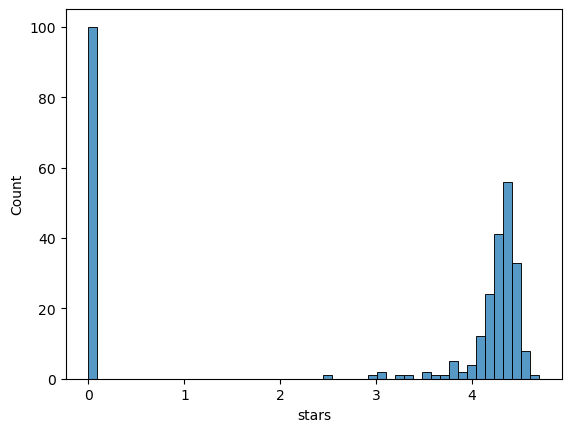

In [3399]:
sns.histplot(rate_products.stars, bins=50)
plt.show()

In [3403]:
# How do customers generally rate products? Is there a common trend?

#common trend is 0

### 2.Measures of Dispersion:

- Determine the variance, standard deviation, and interquartile range for product rating.
- Are the ratings consistent, or is there a wide variation in customer feedback?

In [3567]:
df_rate = df.copy()  
df_dispersion = df.copy() 

In [3569]:
df_dispersion = df_rate[["stars", "category"]]
df_dispersion.head(2)

,stars,category
0,4.7,Hi-Fi Speakers
1,4.7,Hi-Fi Speakers


#### test 

In [3505]:
df_rate = df_rate[["stars", "category"]]

In [3486]:
df_rate.shape

(2443651, 2)

In [3486]:
df_rate.shape

(2443651, 2)

In [3488]:
df_rate.head(2)

,stars,category
0,4.7,Hi-Fi Speakers
1,4.7,Hi-Fi Speakers


In [3490]:
df_rate = df_rate.groupby("category").value_counts()

In [3492]:
df_rate = df_rate.reset_index()
df_rate

,category,stars,count
0,3D Printers,0.0,87
1,3D Printers,4.4,22
2,3D Printers,4.3,18
3,3D Printers,4.2,16
4,3D Printers,4.0,13
...,...,...,...
8780,eBook Readers & Accessories,2.8,1
8781,eBook Readers & Accessories,3.4,1
8782,eBook Readers & Accessories,3.5,1
8783,eBook Readers & Accessories,3.8,1


In [3508]:
df_rate.describe()

,stars
count,8785.000000
mean,3.310905
std,1.207035
min,0.000000
25%,2.600000
50%,3.500000
75%,4.300000
max,5.000000


#### code

In [3571]:
df_dispersion = df_dispersion["stars"].describe()
df_dispersion = df_dispersion.reset_index().round(2)
df_dispersion

,index,stars
0,count,2443651.00
1,mean,2.15
2,std,2.19
3,min,0.00
4,25%,0.00
5,50%,0.00
6,75%,4.40
7,max,5.00


In [3575]:
2.19 ** 2

4.7961

In [3587]:
q1 = 0.00 
q3 = 4.40
iqr = q3 - q1
iqr

4.4

In [3589]:
min_q = q3 + iqr * 1.5
min_q

11.0

In [3591]:
max_q = q1 - iqr * 1.5
max_q

-6.6000000000000005

In [3594]:
#variance: Approximately      4.7961
#standard deviation:      std  2.19
#interquartile range  iqr      4.4

In [3596]:
#Are the ratings consistent, or is there a wide variation in customer feedback?
#high variation

### 3.Shape of the Distribution:

- Calculate the skewness and kurtosis for the rating column.
- Are the ratings normally distributed, or do they lean towards higher or lower values?

In [3929]:
df_shape = df.copy()

In [3931]:
df_shape.head(1)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


In [3933]:
df_shape = df_shape[["stars", "category"]]
df_shape.head(2)

,stars,category
0,4.7,Hi-Fi Speakers
1,4.7,Hi-Fi Speakers


In [3935]:
df_shape = df_shape["stars"].value_counts()

In [3937]:
df_shape = df_shape.reset_index()

In [3945]:
df_shape.head(5)

,stars,count
0,0.0,1225641
1,4.5,151577
2,4.6,136995
3,4.4,136165
4,5.0,128492


In [4040]:
from scipy.stats import skew, kurtosis



skewness = skew(xd["stars"])
kurtosis_value = kurtosis(xd["stars"])

print("Skewness:", skewness)
print("Kurtosis:", kurtosis_value)


Skewness: -0.028615310091667345
Kurtosis: -1.1597134885521327


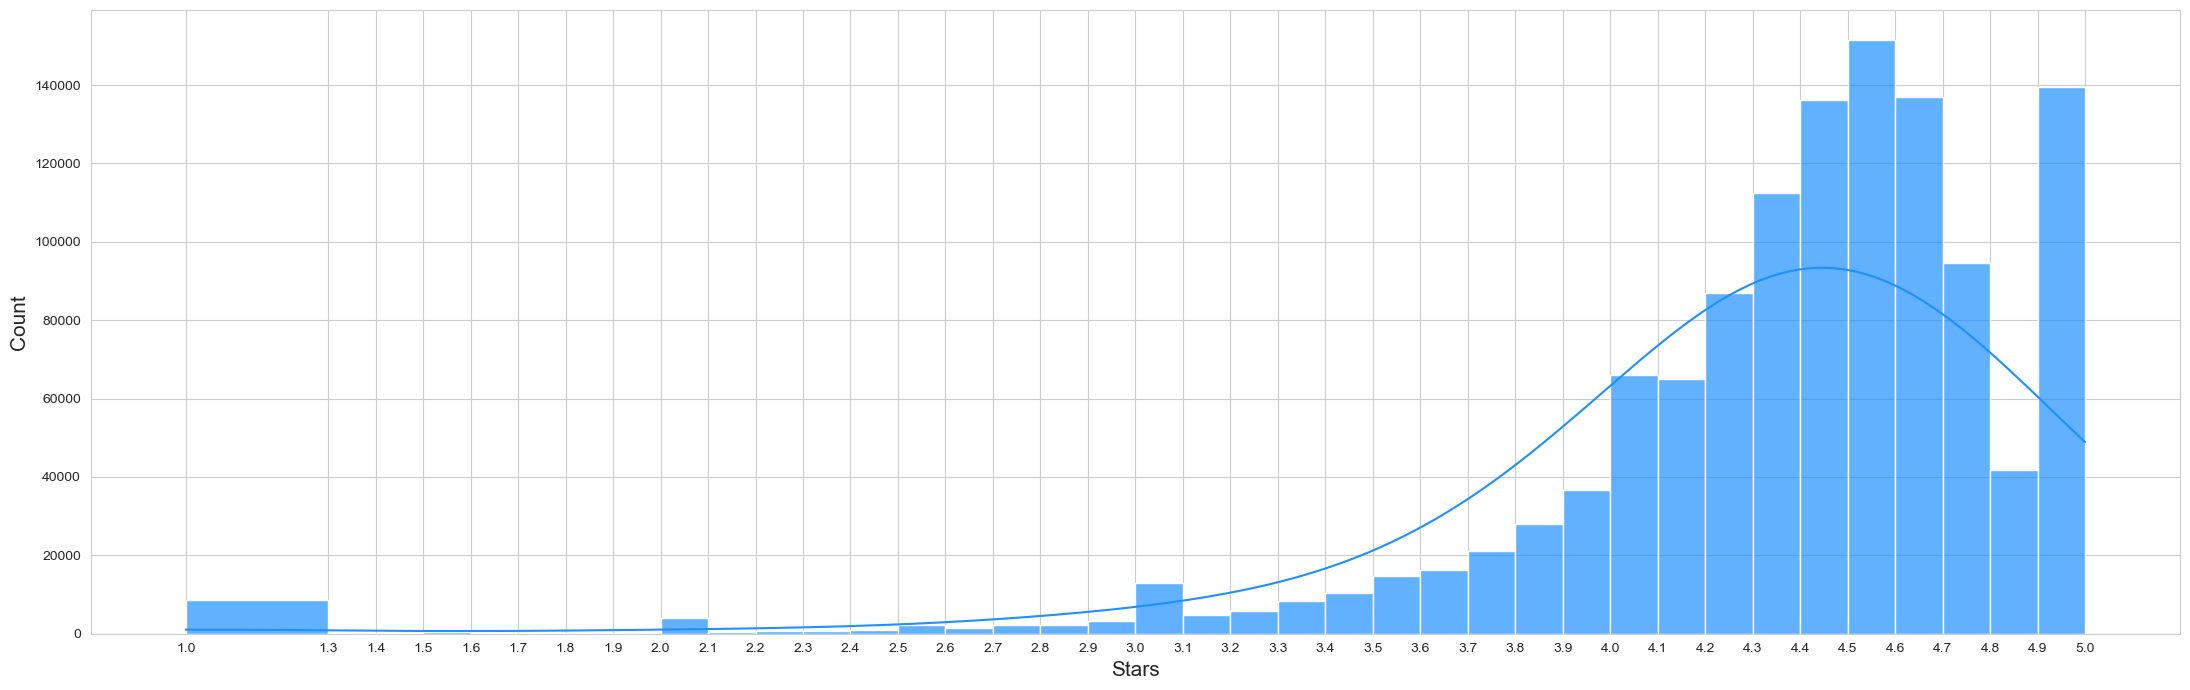

In [4042]:
xd = df_shape[1:40]
xd
bins = sorted(xd["stars"].unique())

plt.figure(figsize=(22, 7))

sns.histplot(xd, x="stars", weights="count", bins=bins, color="dodgerblue", alpha=0.7, kde=True)
plt.xlabel("Stars", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(bins)   
plt.tight_layout()
plt.show()


In [4035]:
#right skewenes
#high kurtosis

In [ ]:
#are the ratings normally distributed, or do they lean towards higher or lower values?
#tends to favor higher values

### 4. Visualizations:

- Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [4033]:
df.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


## s